# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

act_data = pd.read_csv("../data/act.csv", na_values=['NA'])
sat_data = pd.read_csv("../data/sat.csv", na_values=['NA'])

##### 2. Print the first ten rows of each dataframe.

In [2]:
act_data.drop(columns="Unnamed: 0", inplace=True)

In [3]:
sat_data.drop(columns="Unnamed: 0", inplace=True)

##### 3. Describe in words what each variable (column) is.

Unnamed: Id assocaited to the row

State: Location of the data in the row

Participation: Percent of students that took the test

Subjects: Average/Mean of students' scores for that subject

Total: Sum of all subjects

##### 4. Does the data look complete? Are there any obvious issues with the observations?

The first column of both files of data are missing a name. It's currently entitled "Unnamed: 0".

We'll need to adjust Unnamed: 0 and Math since they're both shared features in ACT and SAT.

##### 5. Print the types of each column.

In [4]:
print(act_data.dtypes)
print(sat_data.dtypes)

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

There are two things based on preference:
1. We can convert the Participation column into a float
2. We can match the Total column within the SAT data to the Total column within the ACT data by converting it to a float.
   
   The same can be done to all of the subject values within the SAT data

In [5]:
act_data["Participation"] = act_data["Participation"].str.rstrip("%").astype('float')
sat_data["Participation"] = sat_data["Participation"].str.rstrip("%").astype('float')

The first two issues have been addressed and fixed.

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [6]:
def each_val_per_state(data):
    state_dict = {}
    
    data_columns = list(data)
    state_loc = data_columns.index("State")+1
    
    for x in data_columns[state_loc:]:
        state_dict[x] = data.set_index("State").to_dict()[x]

    return state_dict

sat_dict = each_val_per_state(sat_data)
act_dict = each_val_per_state(act_data)

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [7]:
sat_data_list = sat_data.to_dict('list')
sat_data_series = sat_data.to_dict('series')
act_data_list = act_data.to_dict('list')
act_data_series = act_data.to_dict('series')

##### 9. Merge the dataframes on the state column.

In [8]:
merged_dataframe = pd.merge(act_data,sat_data, on=["State"])

##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [9]:
merged_dataframe = pd.merge(act_data,sat_data, on=["State"], suffixes=('_act','_sat'))

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [10]:
#only run once
rearranged_columns = ['State', 'Participation_act', 'English', 'Math_act', 'Reading', 'Science', 'Composite', 'Participation_sat', 'Evidence-Based Reading and Writing', 'Math_sat', 'Total']
merged_dataframe = merged_dataframe[rearranged_columns]

In [11]:
a = merged_dataframe.min()[3:]
b = merged_dataframe.max()[3:]
print("Min:","\n", a,"\n\n", "Max:","\n", b)

Min: 
 Math_act                                18
Reading                               18.1
Science                                2.3
Composite                             17.8
Participation_sat                        2
Evidence-Based Reading and Writing     482
Math_sat                                52
Total                                  950
dtype: object 

 Max: 
 Math_act                              25.3
Reading                                 26
Science                               24.9
Composite                             25.5
Participation_sat                      100
Evidence-Based Reading and Writing     644
Math_sat                               651
Total                                 1295
dtype: object


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [12]:
filler_columns_mean = ["Mean"] #not asked for, but useful to see
filler_columns_sd = ["Std"]

mean = [merged_dataframe[x].mean() for x in rearranged_columns[1:]]
sd = [merged_dataframe[x].std() for x in rearranged_columns[1:]]

mean = pd.Series(filler_columns_mean+mean, name="Mean", index=rearranged_columns)
sd = pd.Series(filler_columns_sd+sd, name="Sd", index=rearranged_columns)

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [13]:
merged_dataframe.loc["Mean"] = mean
merged_dataframe.loc["Std"] = sd

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [14]:
merged_dataframe.sort_values("Participation_act").head()

,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
19,Maine,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513.0,499.0,1012.0
29,New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532.0,520.0,1052.0
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0
39,Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,71.0,539.0,524.0,1062.0
38,Pennsylvania,23.0,23.4,23.4,24.2,23.3,23.7,65.0,540.0,531.0,1071.0


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [15]:
merged_dataframe.query("Participation_sat > 50").tail()

,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
39,Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,71.0,539.0,524.0,1062.0
43,Texas,45.0,19.5,20.7,21.1,20.9,20.7,62.0,513.0,507.0,1020.0
45,Vermont,29.0,23.3,23.1,24.4,23.2,23.6,60.0,562.0,551.0,1114.0
46,Virginia,29.0,23.5,23.3,24.6,23.5,23.8,65.0,561.0,541.0,1102.0
47,Washington,29.0,20.9,21.9,22.1,22.0,21.9,64.0,541.0,534.0,1075.0


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [16]:
def sns_dist_plot(data, title, color):
    f, ax = plt.subplots(1, 1, figsize=(10,5), sharey=True)
    ax.set_title(title, fontsize=20)
    sns.distplot(data[:51],
                 kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                 hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": color}, ax=ax)
    #plt.title(title)
    plt.figure()

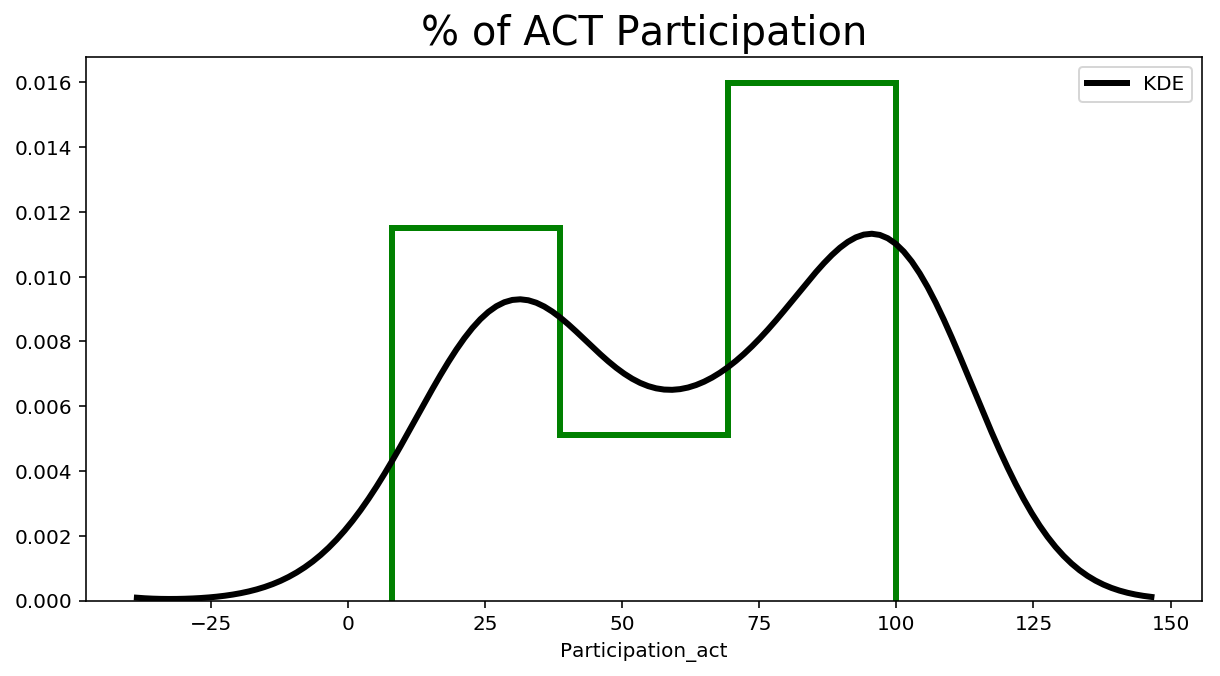

<Figure size 432x288 with 0 Axes>

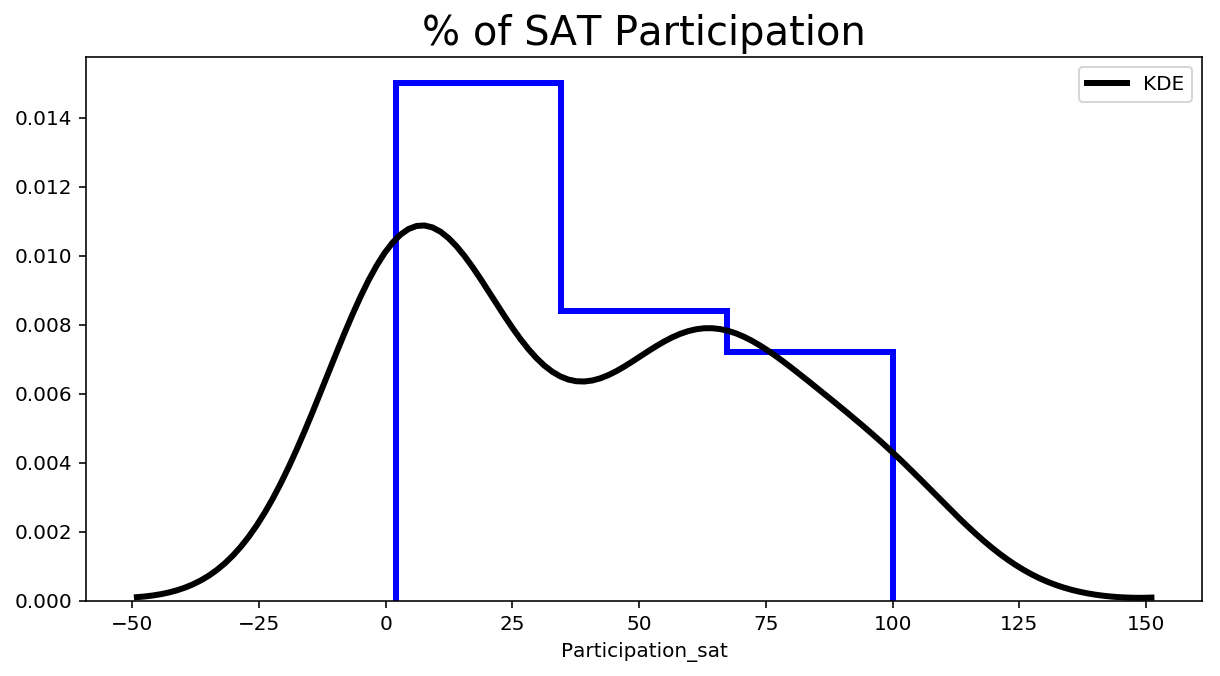

<Figure size 432x288 with 0 Axes>

In [17]:
sns_dist_plot(merged_dataframe["Participation_act"], "% of ACT Participation", "g")
sns_dist_plot(merged_dataframe["Participation_sat"], "% of SAT Participation", "b")

##### 17. Plot the Math(s) distributions from both data sets.

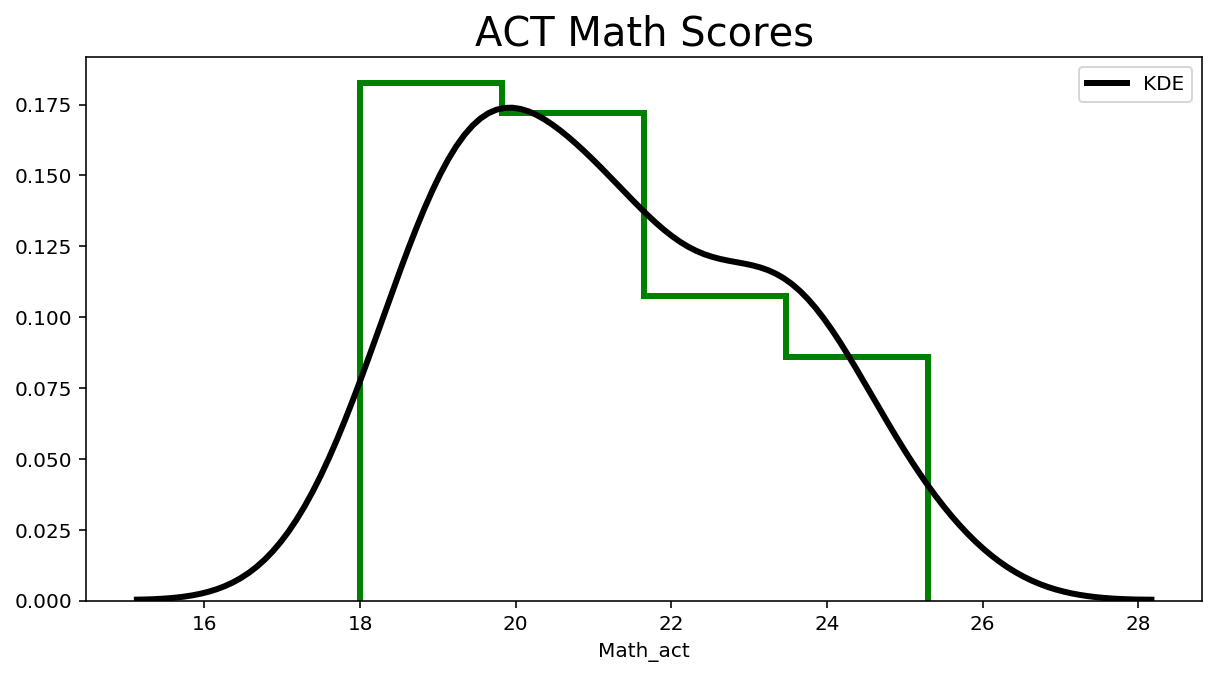

<Figure size 432x288 with 0 Axes>

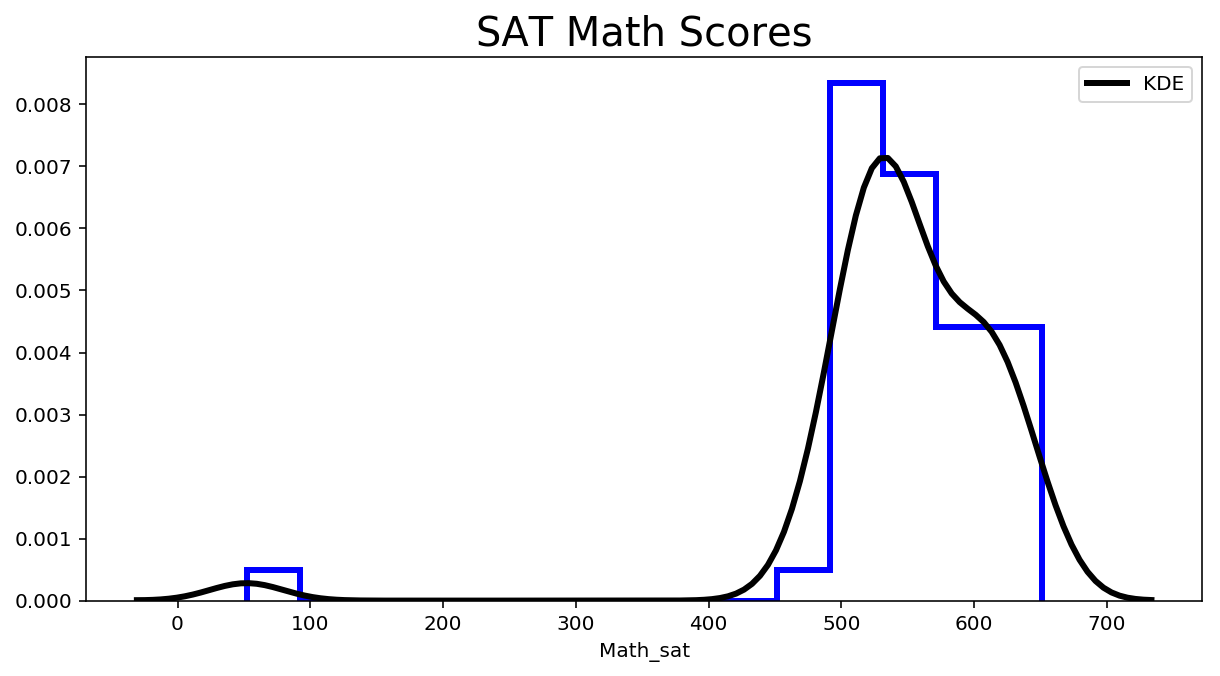

<Figure size 432x288 with 0 Axes>

In [18]:
sns_dist_plot(merged_dataframe["Math_act"], "ACT Math Scores", "g")
sns_dist_plot(merged_dataframe["Math_sat"], "SAT Math Scores", "b")

##### 18. Plot the Verbal distributions from both data sets.

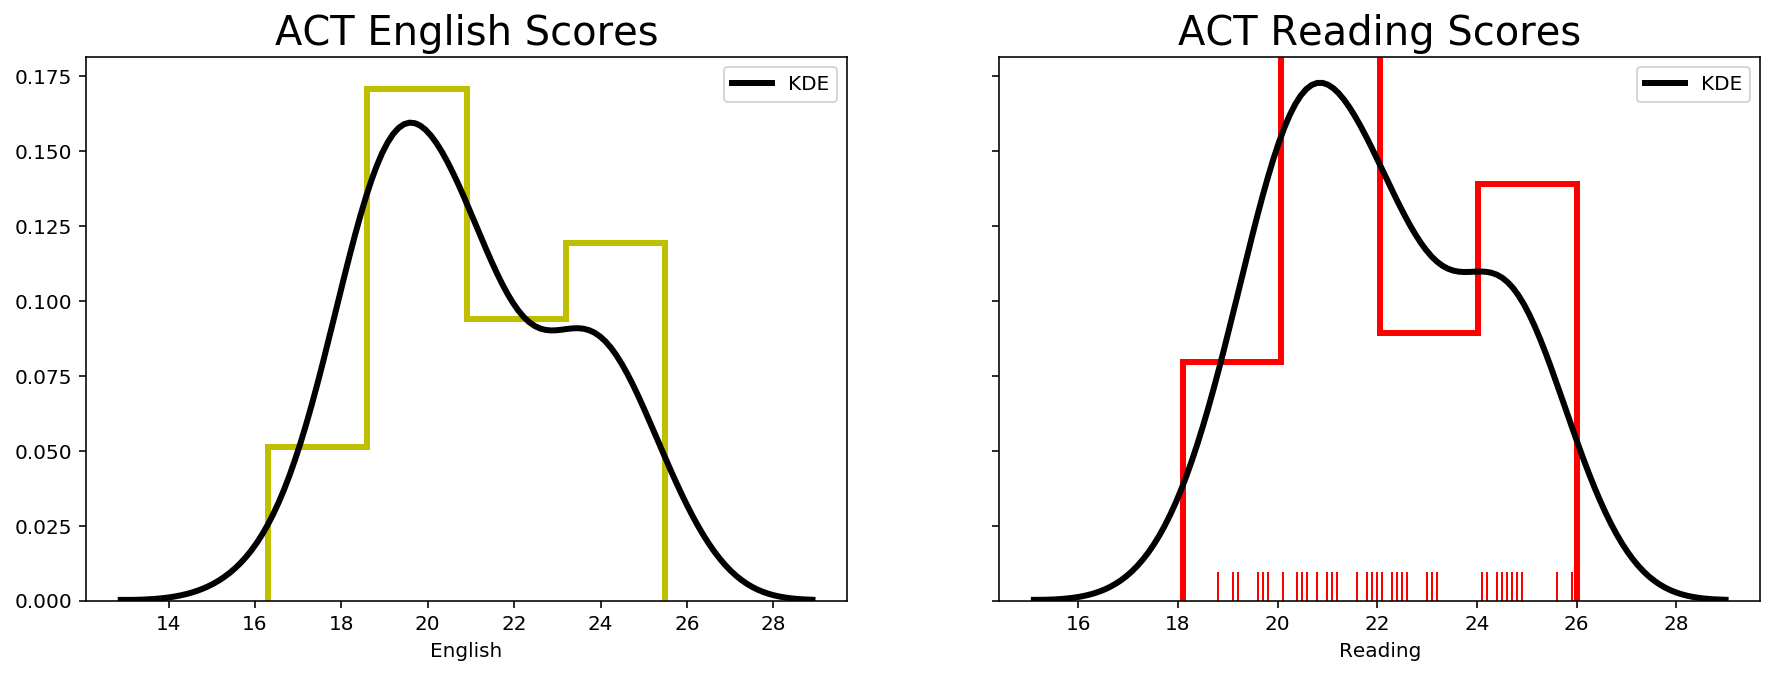

<Figure size 432x288 with 0 Axes>

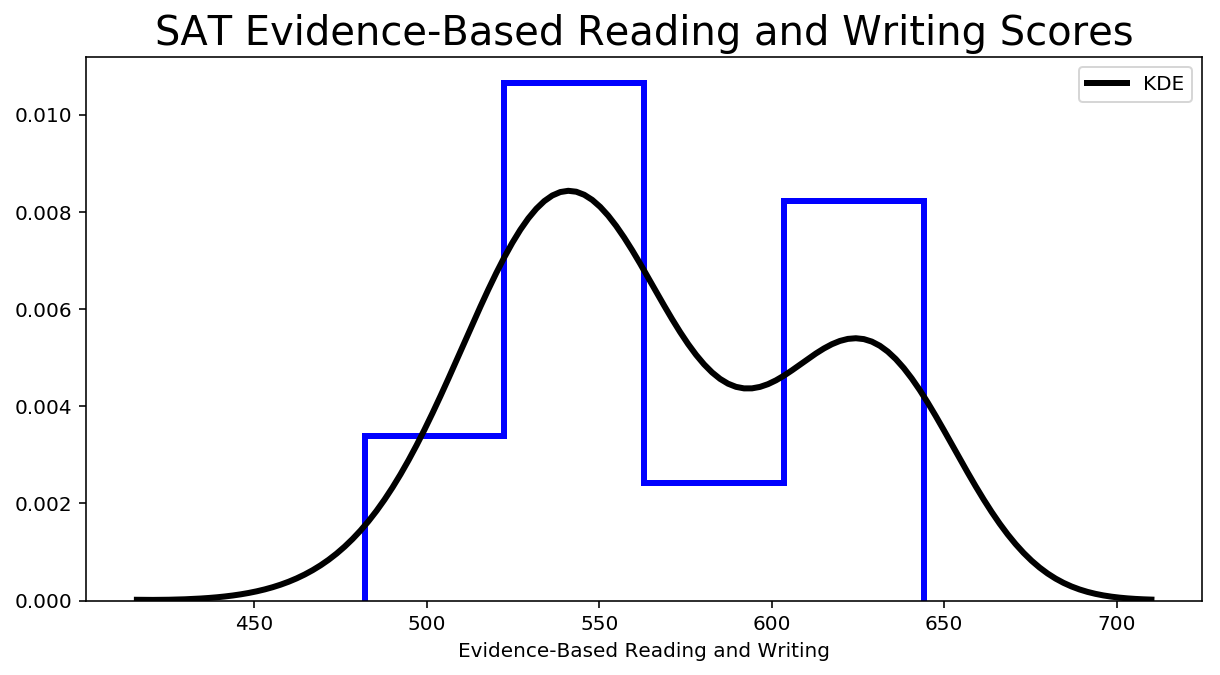

<Figure size 432x288 with 0 Axes>

In [19]:
#sns_plot(merged_dataframe["English"], "ACT English Scores", "g")

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)
ax1.set_title('ACT English Scores', fontsize=20)
sns.distplot(merged_dataframe["English"][:51],
             kde_kws={"color": "k", "lw": 3, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "y"}, ax=ax1)
ax2.set_title('ACT Reading Scores', fontsize=20)
sns.distplot(merged_dataframe["Reading"][:51], rug=True, rug_kws={"color": "r"},
             kde_kws={"color": "k", "lw": 3, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "r"}, ax=ax2)
plt.figure()

sns_dist_plot(merged_dataframe["Evidence-Based Reading and Writing"], "SAT Evidence-Based Reading and Writing Scores", "b")

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

Normal

##### 20. Does this assumption hold true for any of our columns? Which?

Using the following code snippet, we can look at each individual column to assess if it's a normal distribution or not.

`for x in rearranged_columns[3:]:
    sns_dist_plot(merged_dataframe[x], x, "b")`
   
After looking at all of the histograms, none of them are normal distributions.

##### 21. Plot some scatterplots examining relationships between all variables.

In [20]:
def sns_reg_plot(dataX, dataY, title):
    f, ax = plt.subplots(1, 1, figsize=(10,5))
    ax.set_title(title, fontsize=20)
    sns.regplot(dataX[:51], dataY[:51], ax=ax)
    plt.figure()

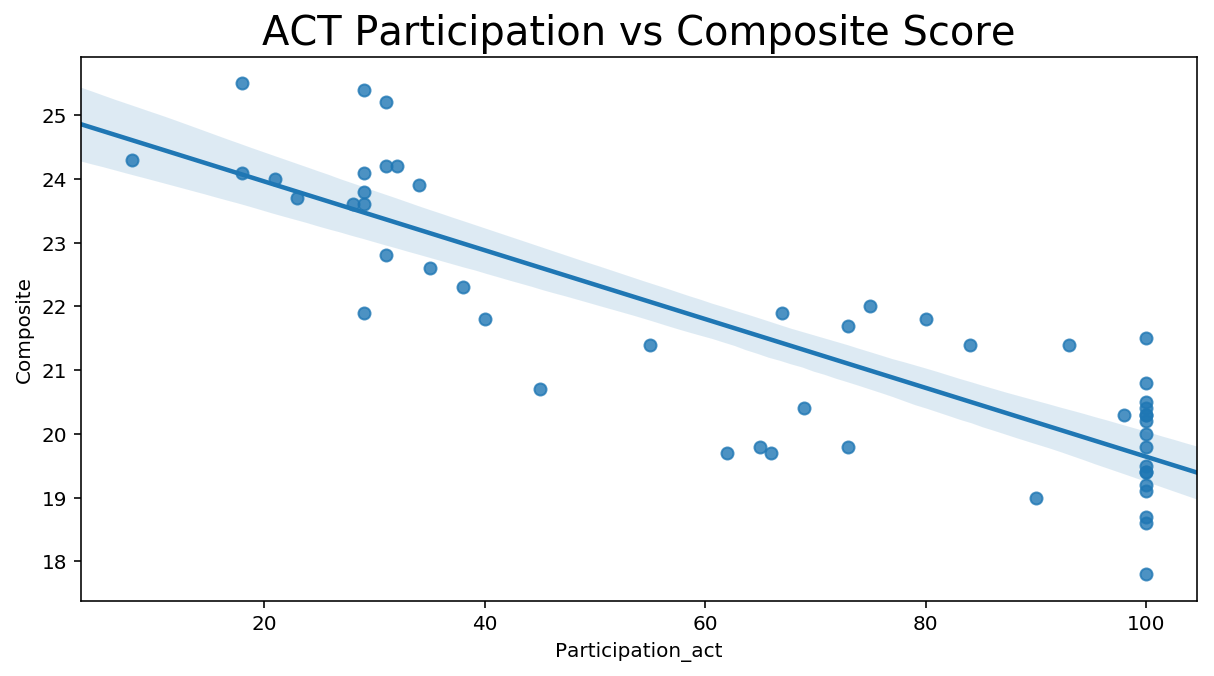

<Figure size 432x288 with 0 Axes>

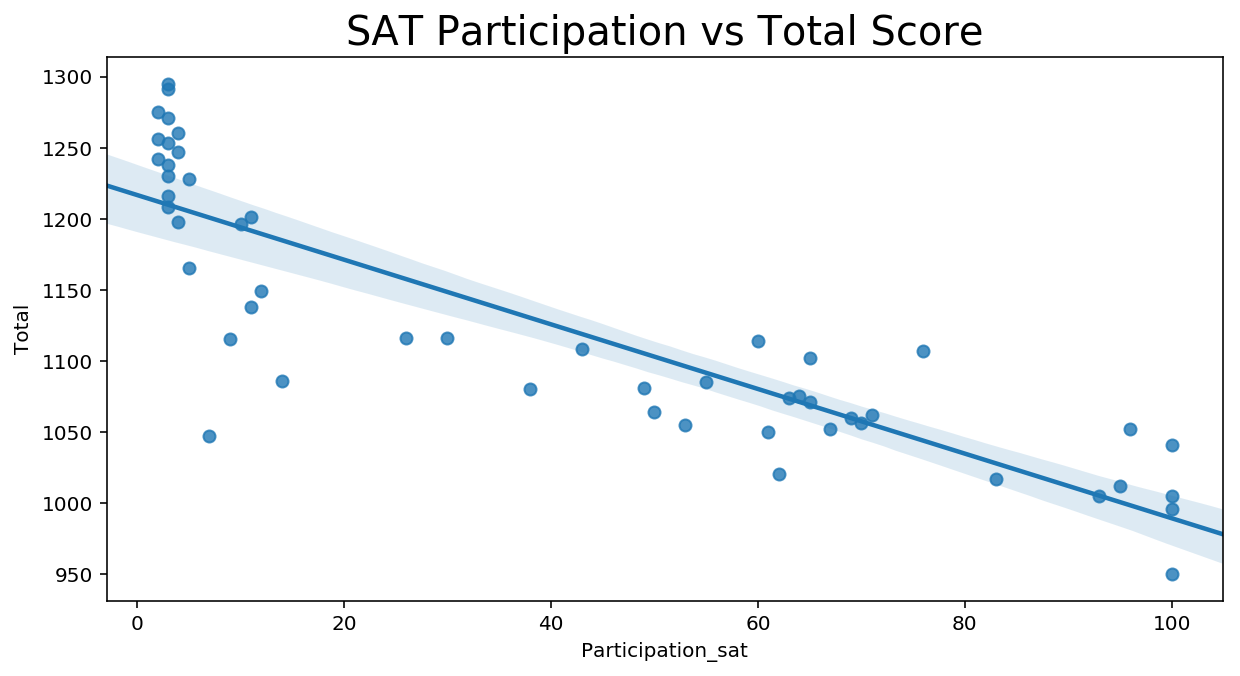

<Figure size 432x288 with 0 Axes>

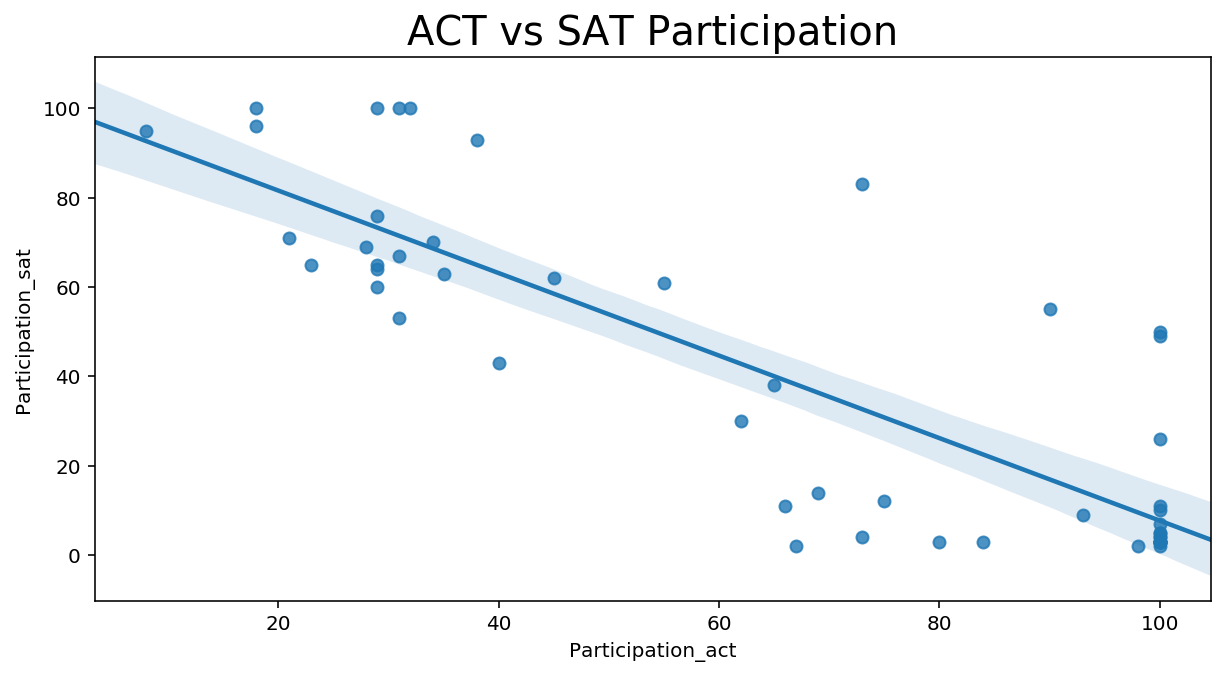

<Figure size 432x288 with 0 Axes>

In [21]:
sns_reg_plot(merged_dataframe["Participation_act"],merged_dataframe["Composite"],"ACT Participation vs Composite Score")
sns_reg_plot(merged_dataframe["Participation_sat"],merged_dataframe["Total"],"SAT Participation vs Total Score")
sns_reg_plot(merged_dataframe["Participation_act"],merged_dataframe["Participation_sat"],"ACT vs SAT Participation")

##### 22. Are there any interesting relationships to note?

The key things to note are the following:
- Test participation (ACT and SAT) is negatively correlated to total test score
- ACT participation is negatively correlated to SAT participation

Based on that, we'll later look into these six states based on their interesting participation rates:
- Mississippi:
    - ACT: 100% - 2nd Lowest ACT Score
    - SAT: 2%   - 9th Highest SAT Score
- Maine
    - ACT: 8%   - 4rth Highest ACT Score
    - SAT: 95%  - 5th Lowest SAT
- Delaware
    - ACT: 18%  - 8th Highest ACT Score
    - SAT: 100% - 2nd Lowest SAT Score

##### 23. Create box plots for each variable. 

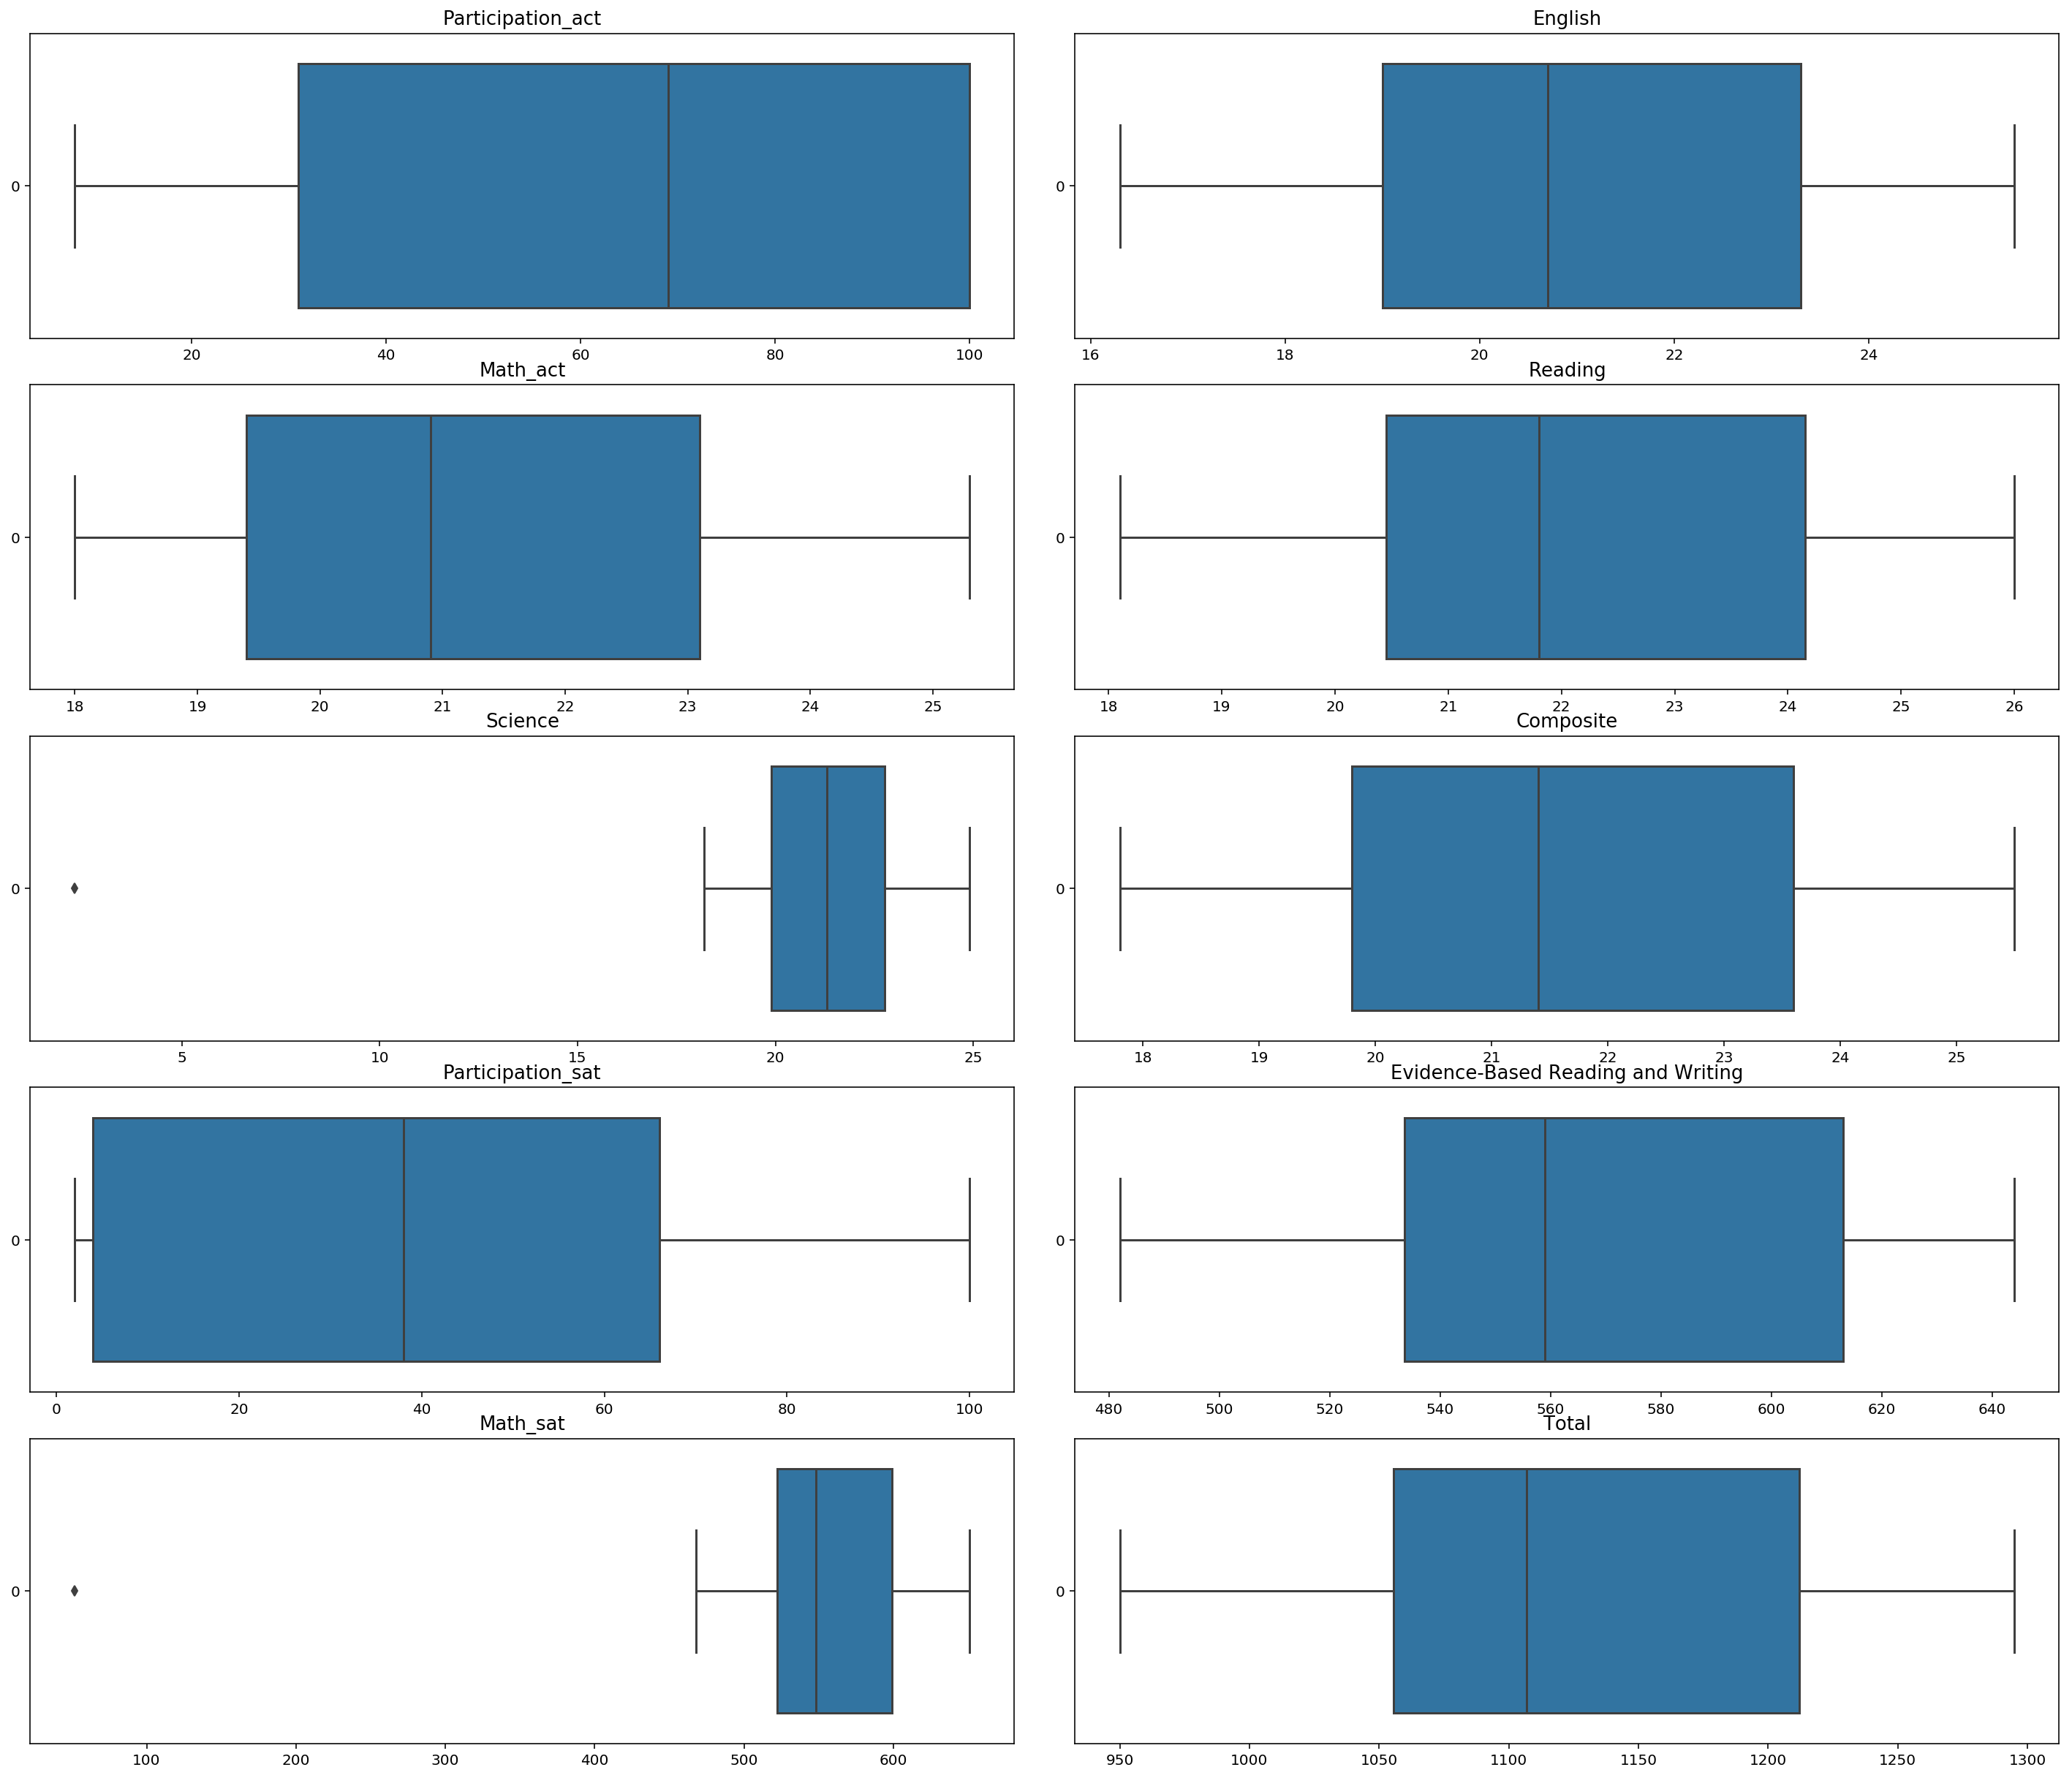

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [22]:
f, axes = plt.subplots(5,2,figsize=(20,17));

for ax, var in zip(axes.flatten(), rearranged_columns[1:]):
    ax.set_title(var, fontsize=13);
    sns.boxplot(data=merged_dataframe[var][:51], orient="h", ax=ax);
    plt.tight_layout();
    plt.figure();

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

https://us-west-2b.online.tableau.com/#/site/mayetm93atgmailcom/workbooks/51742/views

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

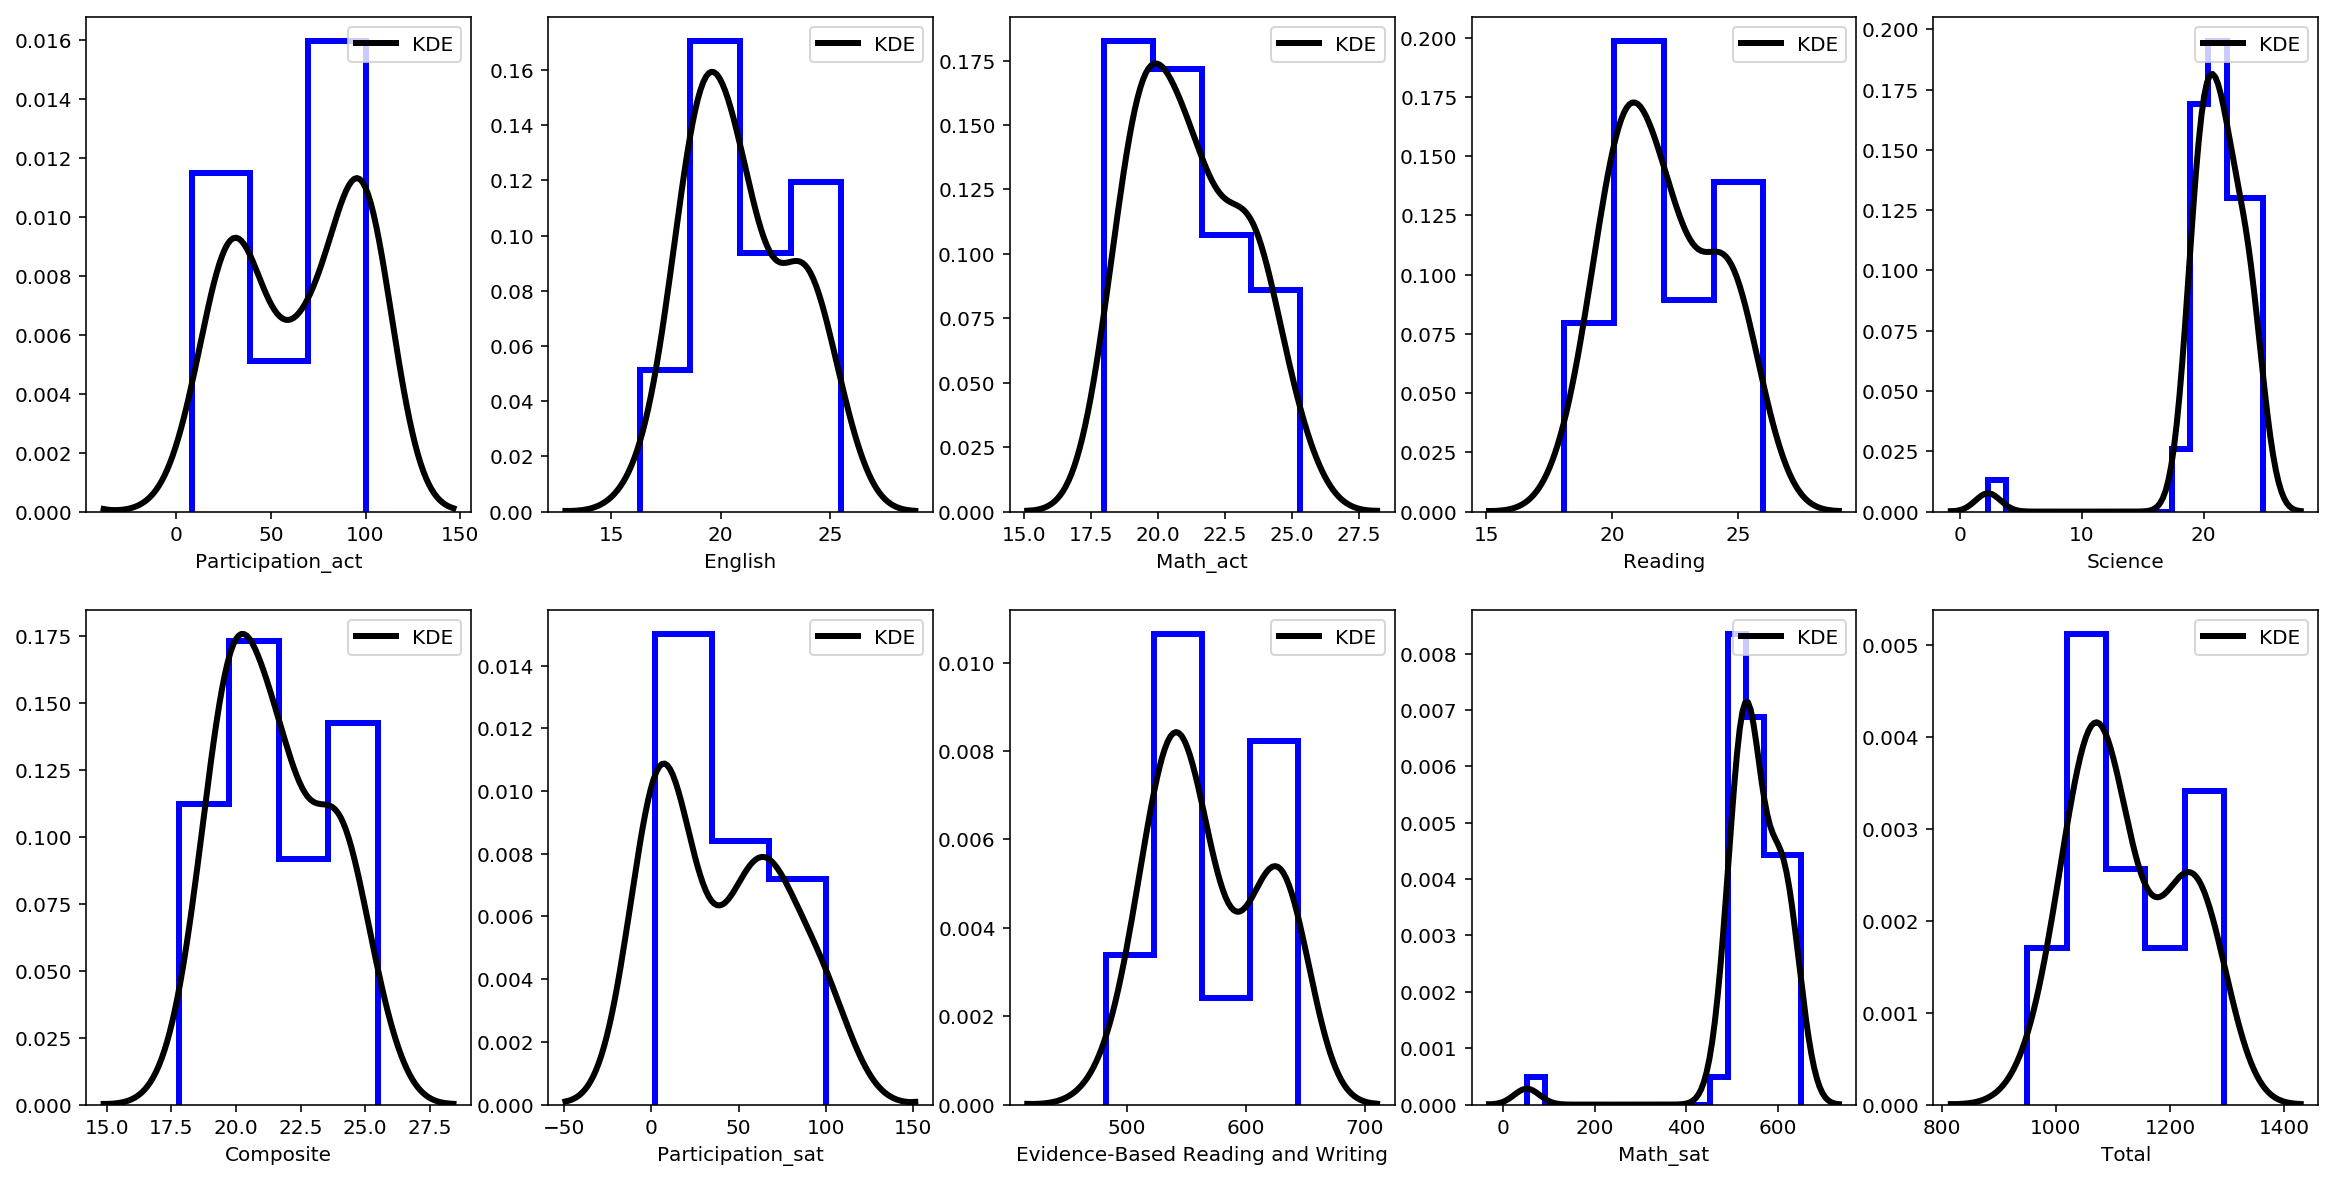

In [23]:
f, axes = plt.subplots(2,5,figsize=(20,10))

for ax, var in zip(axes.flatten(), rearranged_columns[1:]):
    sns.distplot(merged_dataframe[var][:51],
             kde_kws={"color": "k", "lw": 3, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "b"}, ax=ax)
#"Mean = " + str(np.mean(merged_dataframe[var][:51])) + "\n Std = " + str(np.std(merged_dataframe[var][:51]))

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [24]:
import scipy as sp

In [25]:
def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data)
    m, se = np.mean(a), sp.stats.sem(a)
    h = se * sp.stats.t.ppf((1+confidence)/2., len(a)-1)
    return m, m-h, m+h

def get_sample_means(distribution, sample_size = 200, num_samples = 200, replace = False): # randomly sample
    sample_means = []
    for _ in range(num_samples):
        this_mean = np.random.choice(distribution, size=sample_size, replace=replace).mean()
        sample_means.append(this_mean)
    
    return sample_means

def confidence_interval_mean(distribution, confidence=.95):
    #means = np.mean(distribution)
    means = get_sample_means(distribution, sample_size=50)
    
    dist_from_0_or_100 = (100-confidence)/2
    lower_percentile, upper_percentile = 0+dist_from_0_or_100, 100-dist_from_0_or_100

    return (np.percentile(means, lower_percentile), np.percentile(means, upper_percentile))

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [26]:
mean_confidence_interval(merged_dataframe["Participation_act"][:51])

(65.25490196078431, 56.215144484968086, 74.29465943660054)

In [27]:
confidence_interval_mean(merged_dataframe["Participation_act"][:51])

(65.18, 65.19781)

In [28]:
mean_confidence_interval(merged_dataframe["Participation_sat"][:51])

(39.80392156862745, 29.882208872773198, 49.725634264481705)

In [29]:
confidence_interval_mean(merged_dataframe["Participation_sat"][:51])

(40.0, 40.035619999999994)

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

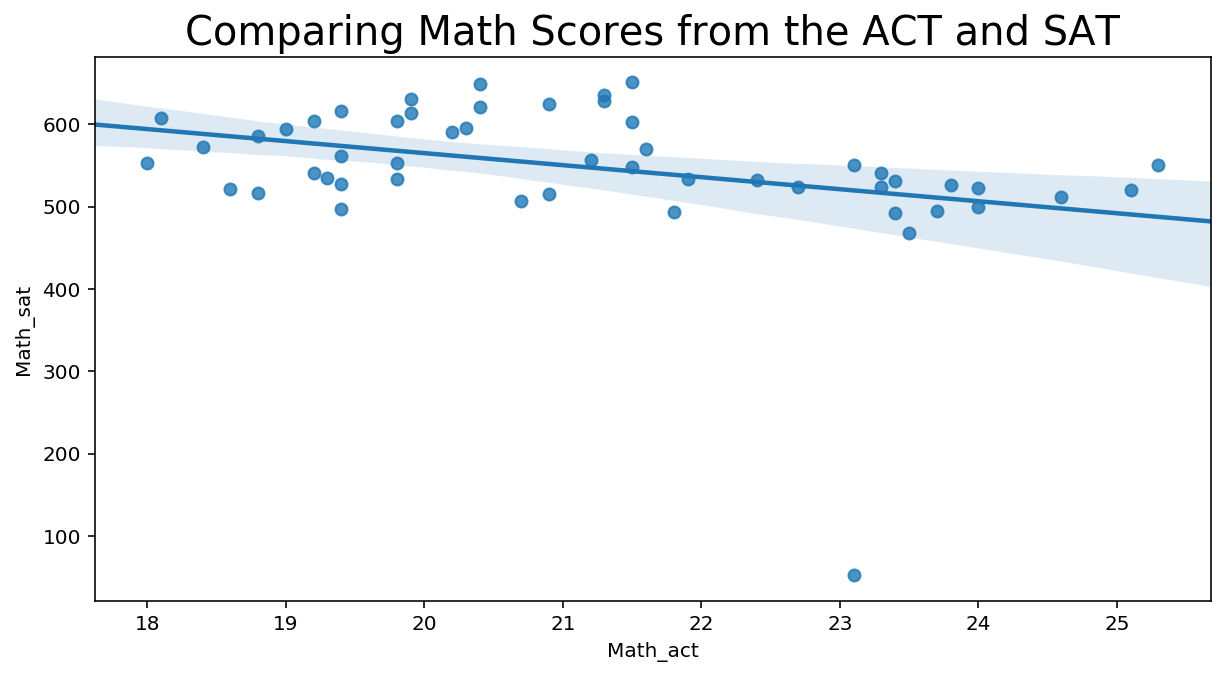

<Figure size 432x288 with 0 Axes>

In [30]:
sns_reg_plot(merged_dataframe["Math_act"],merged_dataframe["Math_sat"], "Comparing Math Scores from the ACT and SAT")

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?